Spreading Out Part 3!

Now we will study the Diffusion equation in 2D!

2d heat conduction:

$$\rho c_P \frac{\Delta T}{\Delta t} = \frac{\partial}{\partial x} \left( \kappa_x \frac{\partial T}{\partial x} \right) + \frac{\partial}{\partial y} \left( \kappa_y \frac{\partial T}{\partial y} \right) $$

where $\rho$ is the density and $c_P$ is the heat capacity and $\kappa$ is thermal conductivity

If $\kappa$ is constant:

$$\frac{\partial T}{\partial t} = \alpha \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \right) $$

Where $\alpha = \frac{\kappa}{\rho c_P}$ is the thermal diffusivity



Problem Statement

Removing heat out of microships is a big problem in comuter industry. 

Understand how heat is dissipatedfrom the chip with very simplified model. 

Everything we learned about finite difference still applies except now we have 2 spatial dimensions.

Now i corresponds to x axis and j to y axis

Discretized 2d Heat equation:

$$\frac{T_{ij}^{n+1} - T_{ij}^n}{\Delta t} = \alpha \left( \frac{T_{i+1j}^n - 2 T_{ij}^n + T_{i-1j}^n}{\Delta x^2} + \frac{T_{ij+1}^n - 2 T_{ij}^n + T_{ij-1}^n}{\Delta y^2} \right)$$

Rearrange to solve for the value at the next time step:

$$T_{ij}^{n+1} = T_{ij}^n + \alpha \left( \frac{\Delta t}{\Delta x^2}(T_{i+1j}^n - 2 T_{ij}^n + T_{i-1j}^n) + \frac{\Delta t}{\Delta y^2}(T_{ij+1}^n - 2 T_{ij}^n + T_{ij-1}^n) \right) $$

As always explicit method will use what is currently known at time step n







Boundary Conditions!

For our problem we have that $\frac{\partial T}{\partial y} = q_y$ and $\frac{\partial T}{\partial x} = q_x$ with $q_y = q_x = 0$ (insulated). Thus at every time step we have to enforce:

$$T_{i,end} = q_y \dot \Delta y + T_{i,end-1}$$

and

$$T_{end, j} = q_x \dot \Delta x + T_{end-1, j}$$

Stability:

revisit stability condition. We have that

$$ \alpha \frac{\Delta t}{(\Delta x)^2} + \alpha \frac{\Delta t}{(\Delta x)^2} < \frac{1}{2}$$

Say that the mesh has the same spacing in x and y, $\Delta x = \Delta y = \sigma$. Therefore stability condition is:

$$\alpha \frac{\Delta t}{\delta^2} < \frac{1}{4}$$

Code Implementation

Array storage

Temps stored in 2D array, x with columns y with rows


In code this is T[j,i]



In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] =16

In [6]:
def ftcs(T, nt, alpha, dt,dx, dy):
    
    #Force j_mid and i_mid to be integers so we can use them as indeces
    #For array T
    
    j_mid = int((numpy.shape(T)[0]/2))
    i_mid = int((numpy.shape(T)[1]/2))
    
    for n in range(nt):
        
        Tn = T.copy()
        
        T[1:-1, 1:-1] = Tn[1:-1,1:-1] + alpha *\
        (dt/dy**2)*(Tn[2:,1:-1] - 2*Tn[1:-1, 1:-1] + Tn[:-2,1:-1] +\
                   dt/dy**2)*(Tn[1:-1,2:] - 2*Tn[1:-1, 1:-1] + Tn[1:-1,:-2])
        
        #Enforce NBC
        
        T[-1,:] = T[-2,:]
        T[:,-1] = T[:,-2]
        
        #Check if we reached 70 Celsius
        
        # Check if we reached T=70C
        if T[j_mid, i_mid] >= 70:
            print ("Center of plate reached 70C at time {0:.2f}s.".format(dt*n))
            break
        
    if T[j_mid, i_mid]<70:
        print ("Center has not reached 70C yet, it is only {0:.2f}C.".format(T[j_mid, i_mid]))
        
    return T

In [7]:
#Initial Conditions

L = 1.0e-2
H = 1.0e-2

nx = 21
ny = 21
nt = 500

dx = L/(nx-1)
dy = H/(ny-1)

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

alpha = 1e-4

Ti = numpy.ones((ny,nx))*20
Ti[0,:] = 100
Ti[:,0] = 100



We don't want our solution to blow up so let's find time step with:

$$\frac{\alpha \Delta t}{\Delta x^2} = \frac{\alpha \Delta t}{\Delta y^2} = \frac{1}{4}$$

In [8]:
sigma = 0.25
dt = sigma * min(dx,dy)**2 / alpha
T = ftcs(Ti.copy(), nt, alpha, dt,dx,dy)

Center of plate reached 70C at time 0.01s.


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in multiply
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in subtract
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in add


In [9]:
mx, my = numpy.meshgrid(x,y)

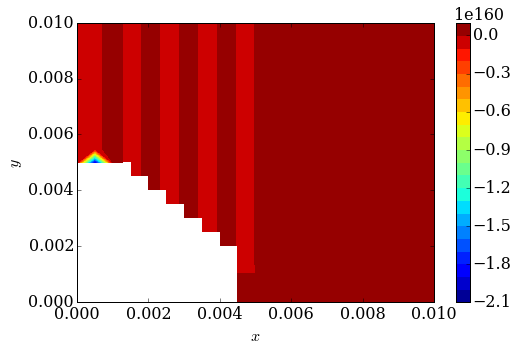

In [11]:
pyplot.figure(figsize = (8,5))
pyplot.contourf(mx,my,T,20)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();